# IDEA: probar varios algoritmos y ver cual nos da el mejor resultado para luego explorarlo mas detalladamente

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# modules
import knn as knnlibrary

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#leo dataset
properties =knnlibrary.get_dataset()

# transformo el campo fecha
properties_caba = knnlibrary.transform_date(properties)

# filtro por CABA y GBA
# queremos solo las propiedades que tienen precio y eliminamos columnas que sabemos que no son 
#redundantes y que no nos servirian para knn
# eliminamos propiedades con mas de 54 pisos
properties_caba = knnlibrary.clean_dataset(properties)

# las expensas tienen demasiados nulos por lo que voy a eliminar esa columna
properties_caba = properties_caba.drop(['expenses'], axis = 1)

# atributos categoricos
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
properties_caba = knnlibrary.encoder_attributes(properties_caba, encoder)

properties_caba.tail()

# eliminamos filas con valores nulo
properties_caba = properties_caba.dropna(how='any')
properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8495 entries, 16 to 34504
Data columns (total 14 columns):
property_type              8495 non-null int64
place_name                 8495 non-null int64
place_with_parent_names    8495 non-null int64
state_name                 8495 non-null int64
lat                        8495 non-null float64
lon                        8495 non-null float64
price                      8495 non-null float64
surface_total_in_m2        8495 non-null float64
surface_covered_in_m2      8495 non-null float64
floor                      8495 non-null float64
rooms                      8495 non-null float64
created_on_year            8495 non-null int64
created_on_month           8495 non-null int64
created_on_day             8495 non-null int64
dtypes: float64(7), int64(7)
memory usage: 995.5 KB


/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


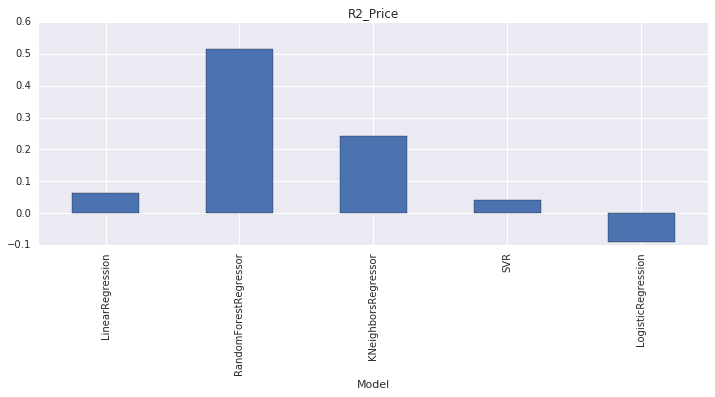

In [3]:
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

# separamos el train de traing para validarlo luego usando un 20% de los datos
X, y = properties_caba.iloc[:, properties_caba.columns != 'price'].values, properties_caba.iloc[:, properties_caba.columns == 'price'].values
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2, random_state=now.microsecond)

# model = RandomForestRegressor(n_estimators=150, max_features='sqrt', n_jobs=-1) 
models = [LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          KNeighborsRegressor(n_neighbors=6),
          SVR(kernel='linear'),
          LogisticRegression()
          ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # fit model on training dataset
    model.fit(Xtrn, Ytrn)
    # predict prices for test dataset and calculate r^2
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    # write obtained data
    TestModels = TestModels.append([tmp])

TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(12, 4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

Elijo el random forest y pruebo con una cantidad mayor de estimadores

In [4]:
model = RandomForestRegressor(n_estimators=200, max_features='sqrt')
model.fit(Xtrn, Ytrn)
r2_score(Ytest, model.predict(Xtest))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


0.52175715283190949

In [5]:
# sigo aumentandp
model = RandomForestRegressor(n_estimators=300, max_features='sqrt')
model.fit(Xtrn, Ytrn)
r2_score(Ytest, model.predict(Xtest))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.52202203728291596

In [ ]:
# sigo aumentandp
model = RandomForestRegressor(n_estimators=3000, oob_score = True , n_jobs = -1,random_state =50,\
                              max_features = "sqrt")
model.fit(Xtrn, Ytrn)

from sklearn.metrics import roc_auc_score
roc_auc_score(Ytest,model.oob_prediction_)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
